In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# importing ploting libraries
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# reading the CSV file into pandas dataframe

df = pd.read_csv("winequality-red.csv") 

In [3]:
wine_data = df.loc[:, 'fixed_acidity':'alcohol']

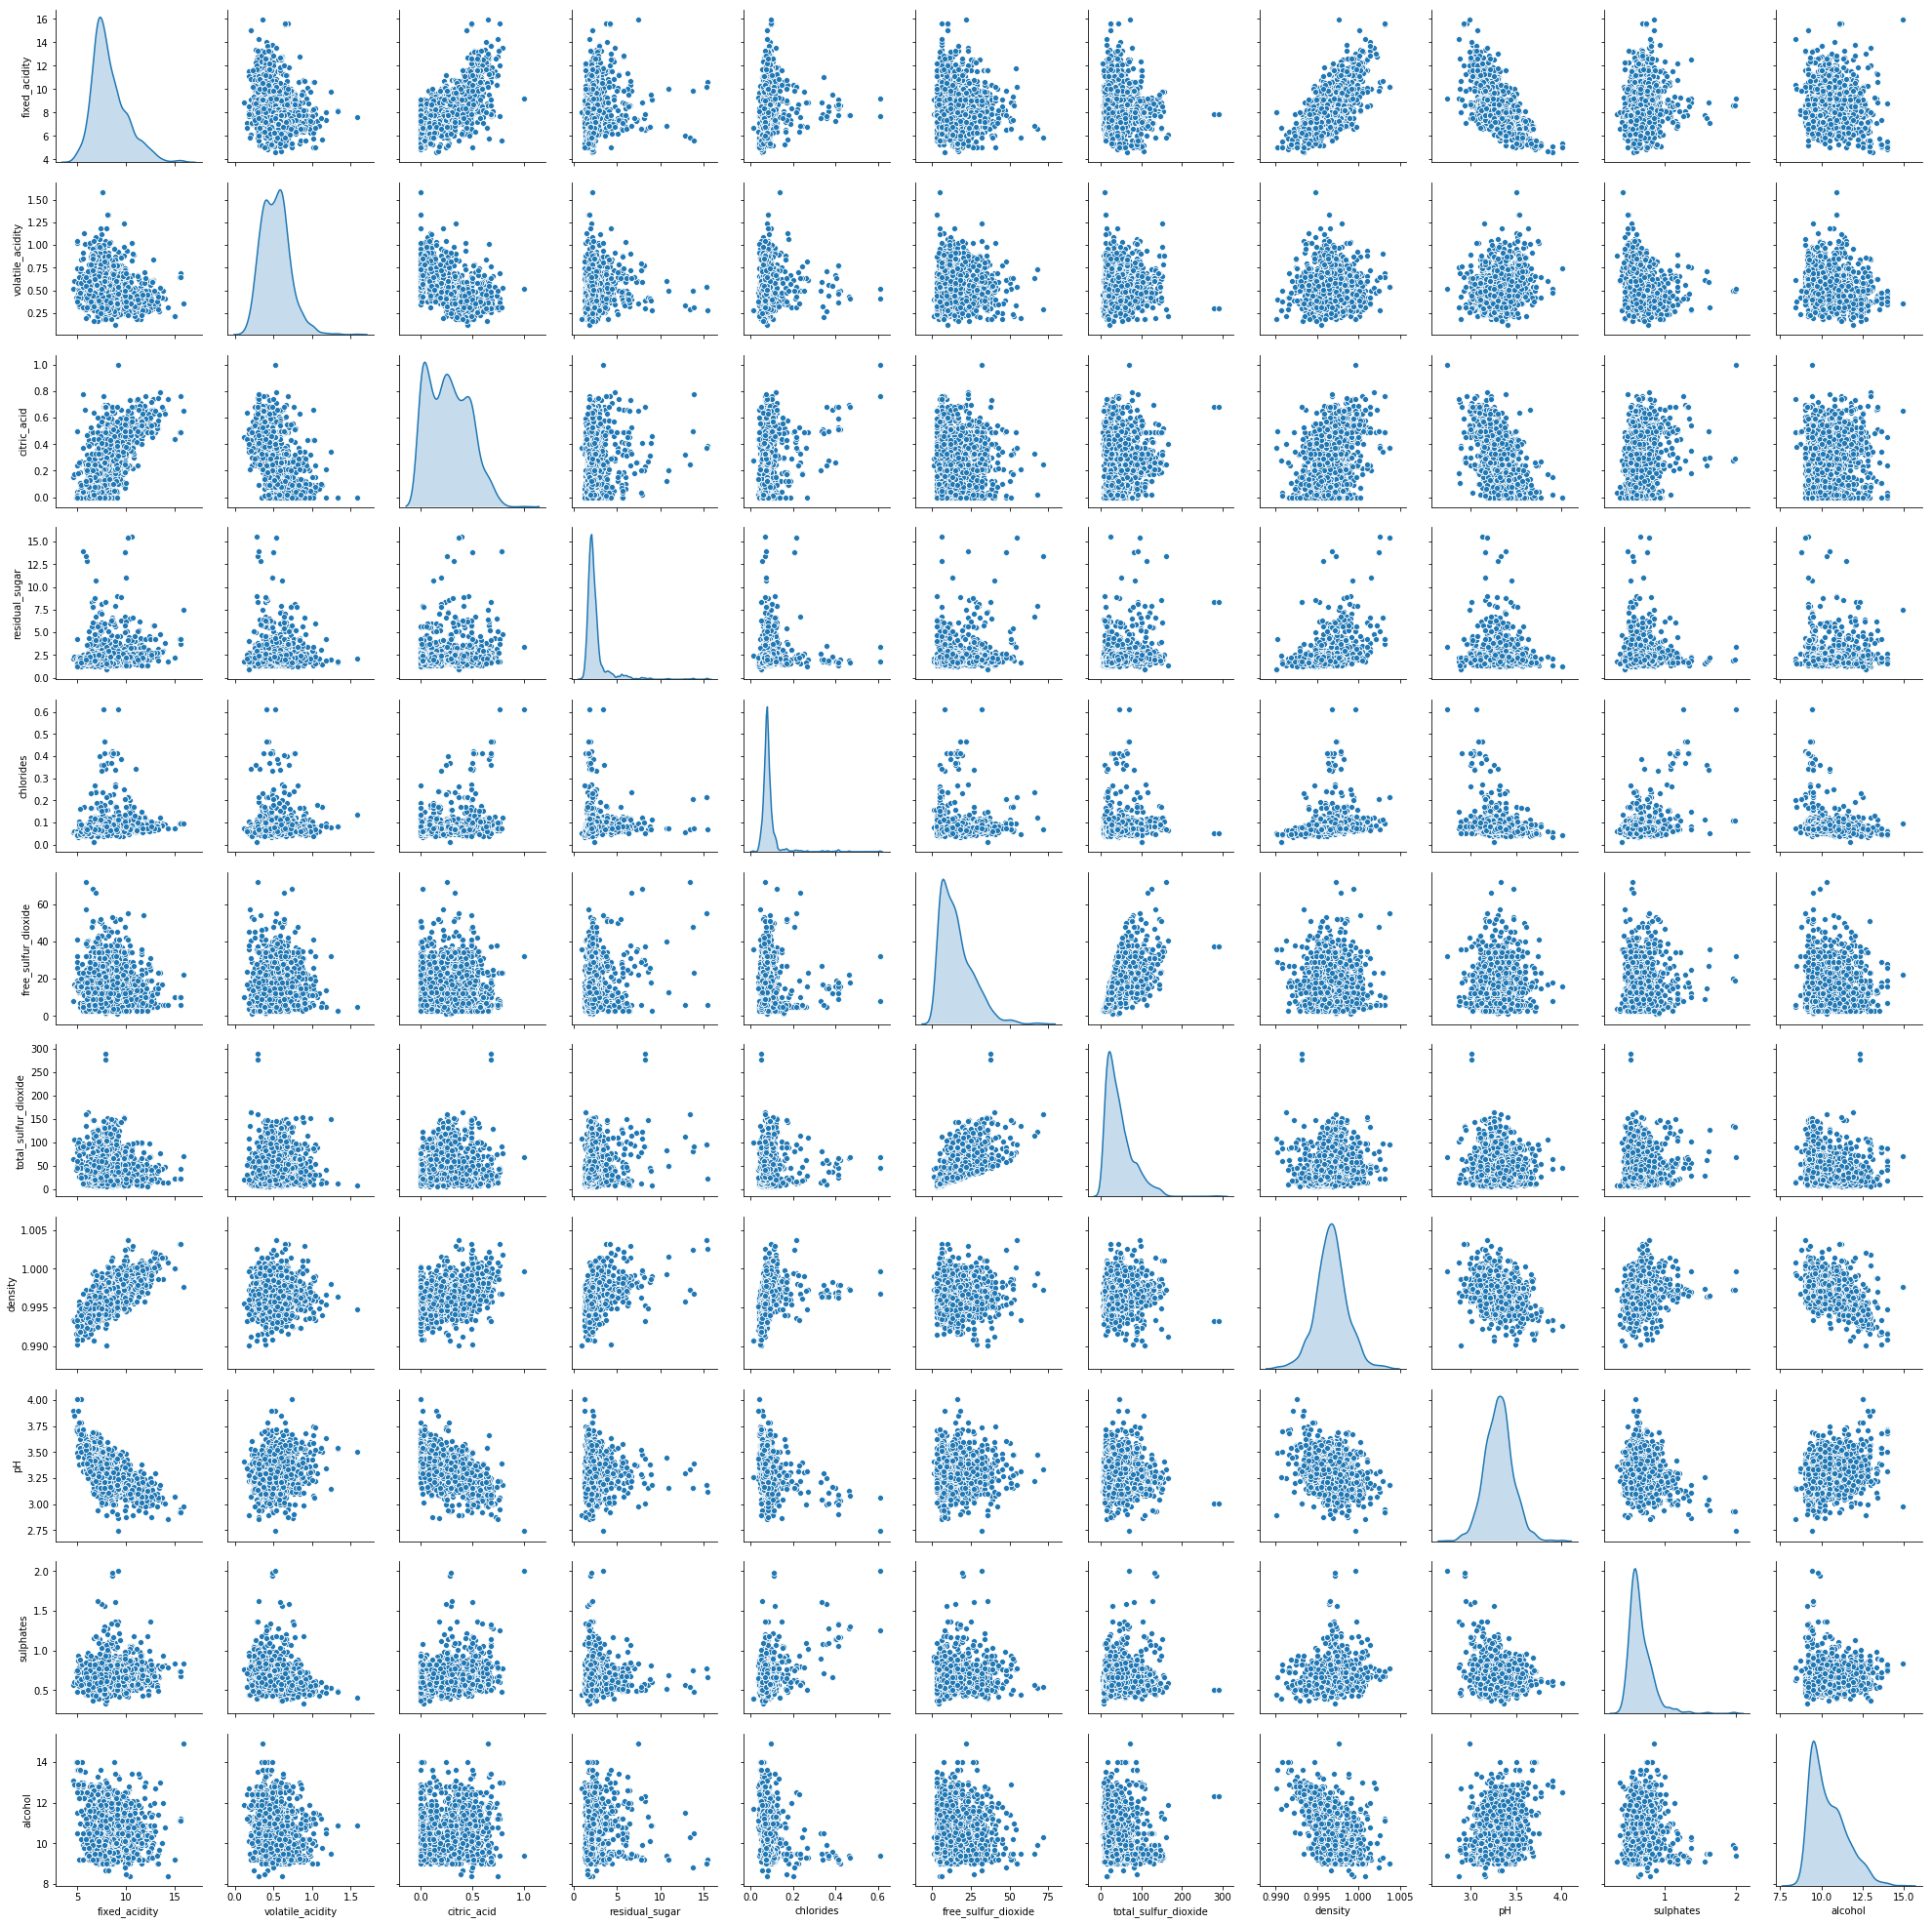

In [4]:
import seaborn as sns
sns.pairplot(wine_data,diag_kind='kde')

In [5]:
wine_data_scaled = wine_data.apply(zscore)

In [9]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans

In [7]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [12]:
cluster_range = range( 1, 8 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(wine_data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:8]

,num_clusters,cluster_errors
0,1,17589.000000
1,2,14330.119811
2,3,12629.974592
3,4,11294.416526
4,5,10155.374026
5,6,9364.134234
6,7,8648.515311


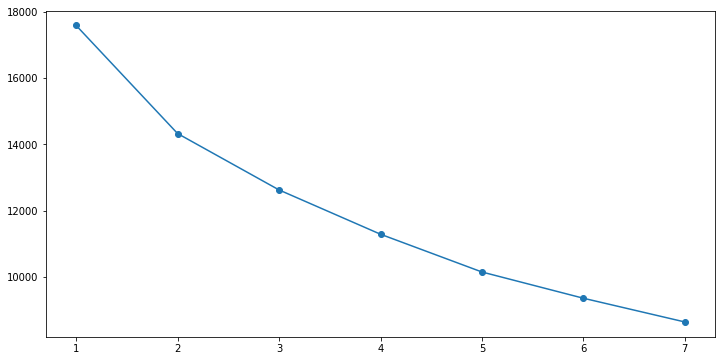

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [34]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [35]:
kmeans.fit(wine_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [36]:
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[-0.09193154,  0.04040678,  0.10002523,  0.40375126, -0.00565364,
         1.06837447,  1.32458255,  0.28337592, -0.17924274, -0.1874165 ,
        -0.51052828,  0.99465241],
       [-0.64954342,  0.45519175, -0.76049371, -0.23041486, -0.18882329,
        -0.22156028, -0.35074257, -0.45100943,  0.61490553, -0.28814064,
         0.0678794 ,  1.        ],
       [ 1.00398862, -0.68568878,  1.02077194,  0.03104975,  0.27616274,
        -0.47686049, -0.48168723,  0.43844069, -0.75207155,  0.55462042,
         0.28259117,  1.09163347]])

In [38]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_scaled) )

In [39]:
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,-0.091932,0.040407,0.100025,0.403751,-0.005654,1.068374,1.324583,0.283376,-0.179243,-0.187416,-0.510528,0.994652
1,-0.649543,0.455192,-0.760494,-0.230415,-0.188823,-0.221560,-0.350743,-0.451009,0.614906,-0.288141,0.067879,1.000000
2,1.003989,-0.685689,1.020772,0.031050,0.276163,-0.476860,-0.481687,0.438441,-0.752072,0.554620,0.282591,1.091633


In [40]:
model.fit(wine_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x0000027279408378>)

In [41]:
wine_data_scaled['labels'] = model.labels_
type(wine_data_scaled)

pandas.core.frame.DataFrame

In [27]:
wine_data['labels'] = model.labels_
type(wine_data)

pandas.core.frame.DataFrame

In [22]:
wine_data_scaled['labels'].value_counts()

1    1567
3      17
0       8
4       4
2       2
5       1
Name: labels, dtype: int64

In [23]:
wine_clusters = wine_data_scaled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])

In [28]:
wine_clusters1 = wine_data.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])

In [29]:
print(wine_clusters1)

In [32]:
wine_groups1=wine_clusters1.head(1599)#This creates a pandas dataframegroupby object


In [33]:
from pandas import ExcelWriter
writer = ExcelWriter('wine_groups1.xls')
wine_groups.to_excel(writer,'Sheet1')
writer.save()



In [43]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [44]:
from scipy.spatial.distance import pdist

In [45]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_scaled, 'average')#Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(wine_data_scaled))

c

0.8086259071115209

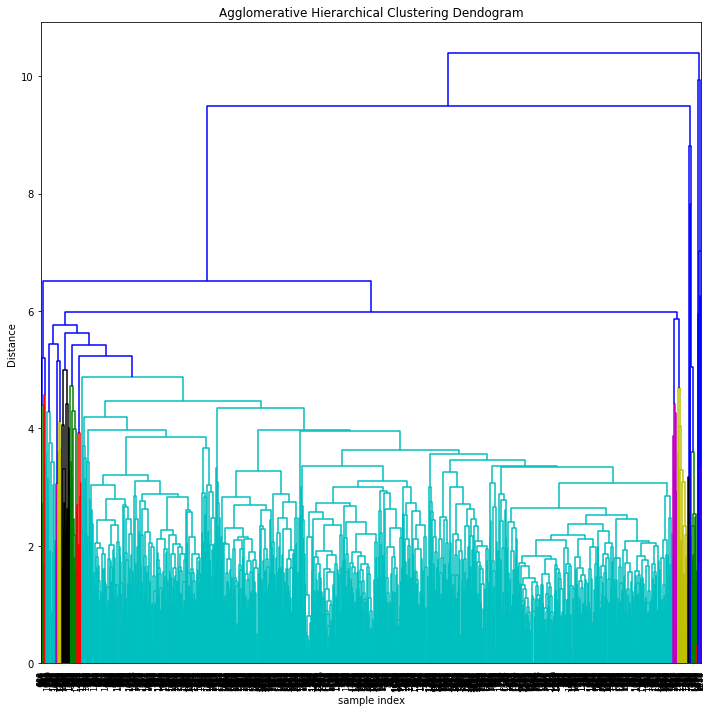

In [47]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=5, leaf_font_size=8. )
plt.tight_layout()